# Prerequisite:
Create a shortcut to Kernel on a Convolution in your MyDrive
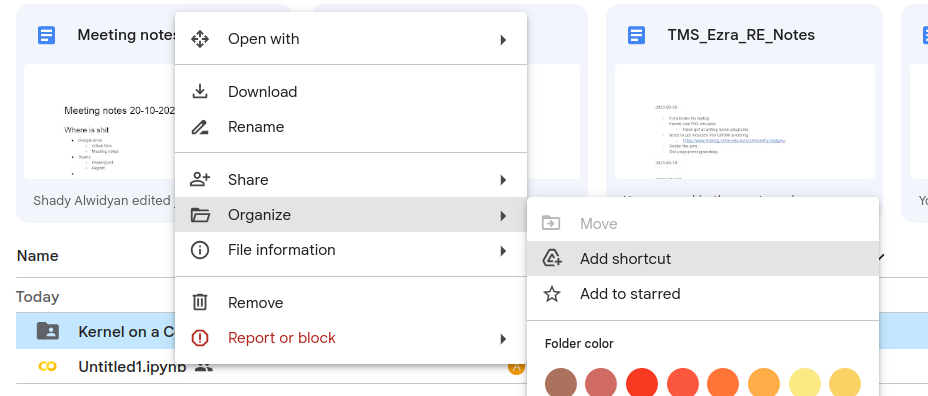

Make sure that you add it to MyDrive, otherewise you will have to change the location specified in the code below.

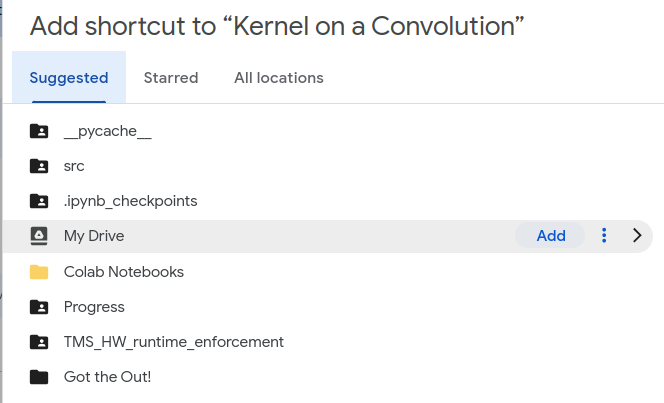

# Setup workspace folders
Here we mount your google drive, and then create a symbolic link which allows us to access the files in a local manner. You should see the koc directory in the top level of the file exporer a short time after this cell is run.

Furthermore, we can now access python scripts from this folder. Here I am using a function from the github used to load the labels and images into our environment.


In [1]:
import sys
sys.path.append('../elpv-dataset/utils')
from elpv_reader import load_dataset

In [3]:
images, probs, types = load_dataset()

In [4]:
print(images.dtype, images.shape)
print(probs.dtype, probs.shape)
print(types.dtype, types.shape)
print(images.dtype, images.shape)
print(probs.dtype, probs.shape)
print(types.dtype, types.shape)

uint8 (2624, 300, 300)
float64 (2624,)
<U4 (2624,)
uint8 (2624, 300, 300)
float64 (2624,)
<U4 (2624,)


Fully connected layer


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F



model = torch.nn.Sequential(
    torch.nn.Linear(120, 20),
    torch.nn.Sigmoid(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(20, 1),
    torch.nn.Dropout(0.5),
    torch.nn.Sigmoid(),
)



c:\Users\shady\anaconda3\envs\COMP9517\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
import numpy as np
import pandas as pd
from numpy.typing import *
from typing import *

import torch
import torchvision.models as models
from PIL import Image

# Check if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pretrained ResNet-50 model
from torchvision.models.resnet import ResNet50_Weights

resnet50 = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1).to(device)
resnet50.fc = torch.nn.Linear(resnet50.fc.in_features, 1)
resnet50.fc = torch.nn.Sequential(
    torch.nn.Linear(resnet50.fc.in_features, 1),
    torch.nn.Sigmoid()
)
# resnet50.eval()  # Set the model to evaluation mode



AttributeError: module 'charset_normalizer' has no attribute 'md__mypyc'

In [ ]:

from torchvision.transforms import v2
# Load an image and preprocess it for the model
def preprocess_image(image):
    preprocess = v2.Compose([
        v2.Resize(256),
        v2.CenterCrop(224),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = preprocess(image).unsqueeze(0)  # Add an extra batch dimension

    print(image)
    return image

# image_path = "koc/data/images/cell0001.png"  # Replace with the path to your image

image_tensor = preprocess_image(torch.from_numpy(np.stack([images[0],images[0], images[0]],axis=0))).to(device)

# Get predictions
with torch.no_grad():
    outputs = resnet50(image_tensor)
    _, predicted_class = outputs.max(1)

print(f"Predicted Class: {predicted_class.item()}")

# If you want to interpret the predictions, you'd typically use the ImageNet class labels to map the predicted class index to a human-readable label.


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


tensor([[[[-0.7993, -0.7993, -0.7993,  ..., -1.1075, -1.1418, -1.1932],
          [-0.7822, -0.7650, -0.7650,  ..., -1.0733, -1.1075, -1.1418],
          [-0.7650, -0.7479, -0.7308,  ..., -1.0390, -1.0733, -1.0904],
          ...,
          [-1.3473, -1.2445, -1.1418,  ..., -0.7993, -0.7993, -0.8164],
          [-1.3473, -1.2274, -1.1075,  ..., -0.8164, -0.8164, -0.8335],
          [-1.3302, -1.2103, -1.1075,  ..., -0.8335, -0.8335, -0.8849]],

         [[-0.6877, -0.6877, -0.6877,  ..., -1.0028, -1.0378, -1.0903],
          [-0.6702, -0.6527, -0.6527,  ..., -0.9678, -1.0028, -1.0378],
          [-0.6527, -0.6352, -0.6176,  ..., -0.9328, -0.9678, -0.9853],
          ...,
          [-1.2479, -1.1429, -1.0378,  ..., -0.6877, -0.6877, -0.7052],
          [-1.2479, -1.1253, -1.0028,  ..., -0.7052, -0.7052, -0.7227],
          [-1.2304, -1.1078, -1.0028,  ..., -0.7227, -0.7227, -0.7752]],

         [[-0.4624, -0.4624, -0.4624,  ..., -0.7761, -0.8110, -0.8633],
          [-0.4450, -0.4275, -

In [ ]:
from torch.utils.data import Dataset, DataLoader


class EVDataset(Dataset):
    def __init__(self, numpy_images, labels=None, transform=None):
        self.images = numpy_images
        self.labels = labels
        self.transform = v2.Compose([
          v2.Resize(256, antialias=True),
          v2.CenterCrop(224),
          v2.ToDtype(torch.float32, scale=True),
          v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        image = torch.from_numpy(np.stack([image, image, image], axis=0))
        if self.transform:
            image = self.transform(image).unsqueeze(0)
        if self.labels is not None:
            return image, torch.Tensor([self.labels[idx]])
        else:
            return image


# Training


In [ ]:
# training set

images_test = images[:656]
images_train = images[656:]
probs_test = probs[:656]
probs_train = probs[656:]


In [ ]:
import torch.optim as optim
train_dataloader  = EVDataset(images_train, probs_train)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet50.to(device)

criterion = torch.nn.BCELoss()
optimizer = optim.SGD(resnet50.parameters(), lr=0.001, momentum=0.9)

# Train for some epochs
num_epochs = 10
avg_loss = 0
factor = 0.9999
for epoch in range(num_epochs):
    resnet50.train()
    for idx, (inputs, labels) in enumerate(train_dataloader):
        inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)  # Ensure labels are float and have correct shape

        optimizer.zero_grad()
        outputs = resnet50(inputs)
        loss = criterion(outputs, labels)
        avg_loss = avg_loss*factor + loss.float()
        loss.backward()
        optimizer.step()
        if idx%100==0:
            print(f'{idx}: loss={loss}')

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")


0: loss=1.8177225589752197
100: loss=4.568091869354248
200: loss=0.914783775806427
300: loss=0.07511134445667267
400: loss=1.6344265937805176
500: loss=0.34516075253486633
600: loss=0.09651478379964828
700: loss=0.10762602090835571
800: loss=1.234196662902832
900: loss=0.034571245312690735
1000: loss=0.11766870319843292
1100: loss=0.20667113363742828
1200: loss=0.7343893051147461
1300: loss=1.7957295179367065
1400: loss=0.9467263221740723
1500: loss=0.07731642574071884
1600: loss=0.04244393855333328
1700: loss=0.3356057107448578
1800: loss=0.2964467704296112
1900: loss=0.4530675411224365
Epoch 1/10, Loss: 0.1770
0: loss=0.17187654972076416
100: loss=1.2333004474639893
200: loss=0.9506953358650208
300: loss=0.0685226246714592
400: loss=0.9236841201782227
500: loss=0.2795807719230652
600: loss=0.12270346283912659
700: loss=0.15382041037082672
800: loss=0.9093585014343262
900: loss=0.044674571603536606
1000: loss=0.1638309210538864
1100: loss=0.17449729144573212
1200: loss=0.5169980525970

In [ ]:

# Train for more epochs
num_epochs = 10
avg_loss = 0
factor = 0.9999
for epoch in range(num_epochs):
    resnet50.train()
    for idx, (inputs, labels) in enumerate(train_dataloader):
        inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)  # Ensure labels are float and have correct shape

        optimizer.zero_grad()
        outputs = resnet50(inputs)
        loss = criterion(outputs, labels)
        avg_loss = avg_loss*factor + loss.float()
        loss.backward()
        optimizer.step()
        if idx%100==0:
            print(f'{idx}: loss={loss}')

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")


Validation


In [ ]:
dataloader.transform(np.stack([images[0]]*3, axis=0))

array([[[14, 14, 14, ...,  9,  9,  9],
        [15, 15, 15, ..., 10,  9,  9],
        [15, 15, 16, ..., 10, 10, 10],
        ...,
        [29, 29, 29, ..., 19, 18,  4],
        [29, 29, 29, ..., 18, 18,  4],
        [29, 29, 29, ..., 18, 18,  4]],

       [[14, 14, 14, ...,  9,  9,  9],
        [15, 15, 15, ..., 10,  9,  9],
        [15, 15, 16, ..., 10, 10, 10],
        ...,
        [29, 29, 29, ..., 19, 18,  4],
        [29, 29, 29, ..., 18, 18,  4],
        [29, 29, 29, ..., 18, 18,  4]],

       [[14, 14, 14, ...,  9,  9,  9],
        [15, 15, 15, ..., 10,  9,  9],
        [15, 15, 16, ..., 10, 10, 10],
        ...,
        [29, 29, 29, ..., 19, 18,  4],
        [29, 29, 29, ..., 18, 18,  4],
        [29, 29, 29, ..., 18, 18,  4]]], dtype=uint8)

In [ ]:
resnet50.eval()
correct = 0
total = 0
test_dataloader = EVDataset(images_test, probs_test)
with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)
        outputs = resnet50(inputs)
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")
